In [1]:
import aim_modules as am
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ChrisM/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
2050/41

50

In [4]:
am.calc_nsteps(0.002, 41, 1) #20500000

20500000.0

In [2]:
# collect all of the TI information
runs = ["run01","run02","run03","run04","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
times = ["100ps","250ps","500ps","1ns","5ns","10ns"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]
coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0]
vdwLambdas  = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
# create a dictionary to hold our results
# each result is a dataframe
# these results aren't comparable because they are for a different setup but we use
# this to init our dictionary
results = {}
for i in times:
    root = ti_home+i
    results[i] = am.import_pickle(root, runs, i)

In [5]:
len(totals)

5

In [4]:
# collect AIM results
cubic_states = {}
trapz_states = {}
aim_counts = {}

for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    aim_counts[j] = {}
    for i in runs:
        cubic_states[j][i] = []
        trapz_states[j][i] = []
        file_in = "/Users/ChrisM/Documents/workspace/AIM/{0}/{0}{1}.out".format(j, i)
        aim, aim_cubic, counts, trapz, cubic, dhdl = am.quad_AIM(file_in, names)
        totals.append(aim)
        cubics.append(aim_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        aim_counts[j][i] = counts
    #hist_flatness(counts, j)
    results[j]['AIM'] = np.array(totals)
    results[j]['AIM-CUBIC'] = np.array(cubics)
    
aim_averages = {}
avg = []
for j in times:
    avg = np.zeros(20)
    for i in runs:
        for k in range(20):
            avg[k] += trapz_states[j][i][k]/5
    aim_averages[j] = avg

In [5]:
# collect TI results
cubic_states = {}
trapz_states = {}
for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    for i in runs:
        file_in = "/Users/ChrisM/Documents/workspace/TI/{0}/{1}.out".format(j, i)
        ti, ti_cubic, trapz, cubic = am.quad_TI(file_in, ti_names, coulLambdas, vdwLambdas)
        totals.append(ti)
        cubics.append(ti_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
    #hist_flatness(counts, j)
    results[j]['TI'] = np.array(totals)
    results[j]['TI-CUBIC'] = np.array(cubics)

ti_averages = {}
avg = []
for j in times:
    avg = np.zeros(20)
    for i in runs:
        for k in range(20):
            avg[k] += trapz_states[j][i][k]/5
    ti_averages[j] = avg

In [5]:
results['100ps']

,BAR,IEXP,TI-CUBIC,DEXP,TI,AIM,AIM-CUBIC
0,20.301677,20.591020,20.460990,20.231092,20.634195,21.536354,21.250975
1,20.065867,19.552652,20.209285,21.189271,20.500763,21.807864,21.552236
2,21.111579,21.499940,21.181324,20.942044,21.416488,21.235398,20.988321
3,19.932471,20.475163,20.018556,19.859602,20.220040,21.879429,21.603259
4,20.703120,20.632505,20.651705,20.454279,20.958295,21.522641,21.239581


In [6]:
results['1ns']

,BAR,MBAR,IEXP,TI,TI-CUBIC,DEXP,AIM,AIM-CUBIC
0,20.652663,20.714087,20.886378,20.875450,20.621476,20.387348,21.112527,20.846041
1,20.658936,20.658982,20.697129,20.929048,20.678208,20.774306,20.898714,20.638577
2,20.280354,20.250653,20.410134,20.549488,20.305961,20.162177,20.951040,20.691132
3,20.501251,20.487897,20.628777,20.767765,20.543666,20.362438,21.206870,20.951334
4,20.091405,20.062493,20.082589,20.330555,20.068433,20.021221,20.878792,20.622507


In [11]:
for i in times:
    print(i, results[i]['TI-CUBIC'].mean(), np.std(results[i]['TI-CUBIC']))
    
# calculate percent increase
# increase = new number - old number
# %increase = increase/orignal number * 100
uncertainties = [np.std(results[i]['TI-CUBIC']) for i in times]
for j in range(len(uncertainties)-1):
    print("{0} - {1} {2} %increase").format(times[j], times[j+1], ((uncertainties[j+1] - uncertainties[j])/uncertainties[j])*100)

('100ps', 4.9005449329429212, 0.095895103848018817)
('250ps', 4.8380801867185834, 0.11336854576831655)
('500ps', 4.9141749098211323, 0.034564911132150843)
('1ns', 4.886008215676231, 0.05412056553115107)
('5ns', 4.9091392085002772, 0.031636646615169753)
('10ns', 4.8988234952981671, 0.016990815117446961)
100ps - 250ps 18.2214119586 %increase
250ps - 500ps -69.5110218642 %increase
500ps - 1ns 56.5766083536 %increase
1ns - 5ns -41.5441315059 %increase
5ns - 10ns -46.2938808777 %increase


In [53]:
((20.477098851121251 - 20.495999232422793)/20.495999232422793)*100

-0.0922149785780785

In [54]:
for i in times:
    print(i, results[i]['AIM-CUBIC'].mean(), np.std(results[i]['AIM-CUBIC']))
    
# calculate percent increase
# increase = new number - old number
# %increase = increase/orignal number * 100
uncertainties = [np.std(results[i]['AIM-CUBIC']) for i in times]
for j in range(len(uncertainties)-1):
    print("{0} - {1} {2} %increase").format(times[j], times[j+1], ((uncertainties[j+1] - uncertainties[j])/uncertainties[j])*100)

('100ps', 21.250974688773756, 0.0)
('250ps', 20.976791341887328, 0.0)
('500ps', 20.556691878236808, 0.0)
('1ns', 20.846040966342933, 0.0)
('5ns', 20.87142894708829, 0.0)
('10ns', 20.855981238704299, 0.0)
100ps - 250ps nan %increase
250ps - 500ps nan %increase
500ps - 1ns nan %increase
1ns - 5ns nan %increase
5ns - 10ns nan %increase


/Users/ChrisM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


In [55]:
for i in results:
    print("TI-CUBIC", i, results[i]['TI-CUBIC'].mean(), np.std(results[i]['TI-CUBIC']))
    print("AIM-CUBIC", i, results[i]['AIM-CUBIC'].mean(), np.std(results[i]['AIM-CUBIC']))

('TI-CUBIC', '10ns', 20.442561816653168, 0.0)
('AIM-CUBIC', '10ns', 20.855981238704299, 0.0)
('TI-CUBIC', '500ps', 20.642318341718163, 0.0)
('AIM-CUBIC', '500ps', 20.556691878236808, 0.0)
('TI-CUBIC', '250ps', 20.154949177927488, 0.0)
('AIM-CUBIC', '250ps', 20.976791341887328, 0.0)
('TI-CUBIC', '1ns', 20.621475972763186, 0.0)
('AIM-CUBIC', '1ns', 20.846040966342933, 0.0)
('TI-CUBIC', '5ns', 20.324081427918411, 0.0)
('AIM-CUBIC', '5ns', 20.87142894708829, 0.0)
('TI-CUBIC', '100ps', 20.460989920738072, 0.0)
('AIM-CUBIC', '100ps', 21.250974688773756, 0.0)


In [56]:
from scipy import stats
#AIM vs TI
times = ["500ps","1ns","5ns","10ns"]
for i in times:
    print(i, stats.ttest_ind(results[i]['AIM-CUBIC'], results[i]['TI-CUBIC'], equal_var=False))

('500ps', Ttest_indResult(statistic=nan, pvalue=nan))
('1ns', Ttest_indResult(statistic=nan, pvalue=nan))
('5ns', Ttest_indResult(statistic=nan, pvalue=nan))
('10ns', Ttest_indResult(statistic=nan, pvalue=nan))


/Users/ChrisM/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/ChrisM/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [57]:
#TI vs TI
times = ["5ns","10ns"]
for i in range(len(times)-1):
    print(times[0]+"-"+times[i+1], stats.ttest_ind(results[times[0]]['TI-CUBIC'], results[times[i+1]]['TI-CUBIC'], equal_var=False))

('5ns-10ns', Ttest_indResult(statistic=nan, pvalue=nan))


In [58]:
#AIM vs AIM
times = ["5ns","10ns"]
for i in range(len(times)-1):
    print(times[0]+"-"+times[i+1], stats.ttest_ind(results[times[0]]['AIM-CUBIC'], results[times[i+1]]['AIM-CUBIC'], equal_var=False))

('5ns-10ns', Ttest_indResult(statistic=nan, pvalue=nan))


100ps


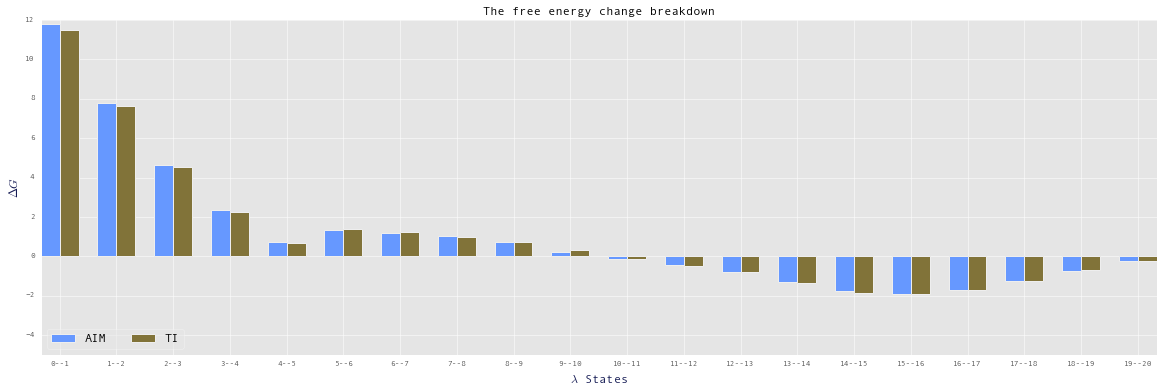

250ps


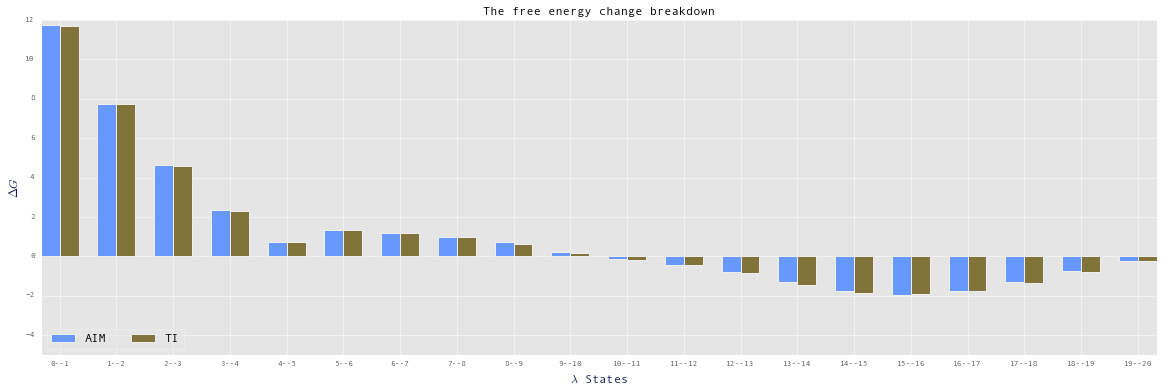

500ps


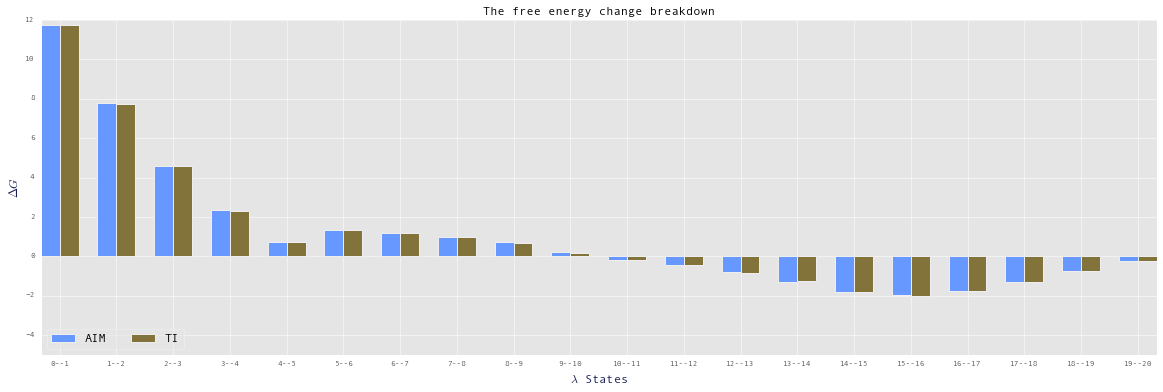

1ns


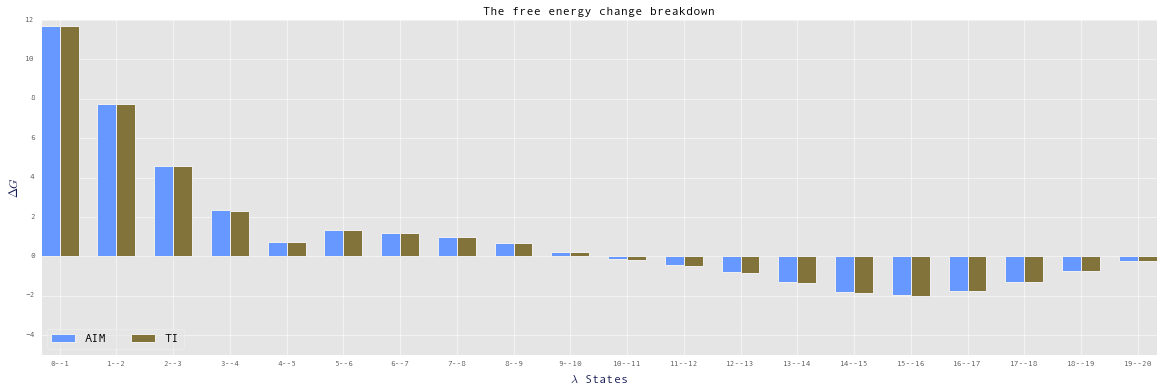

5ns


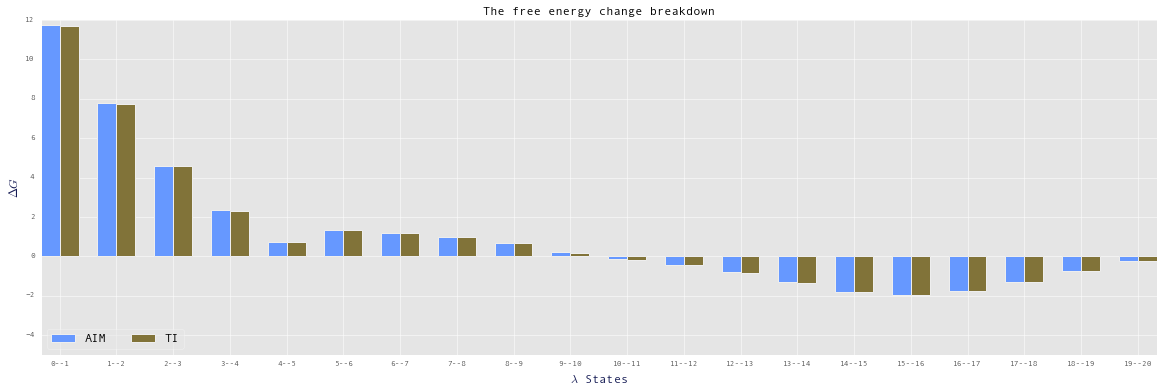

10ns


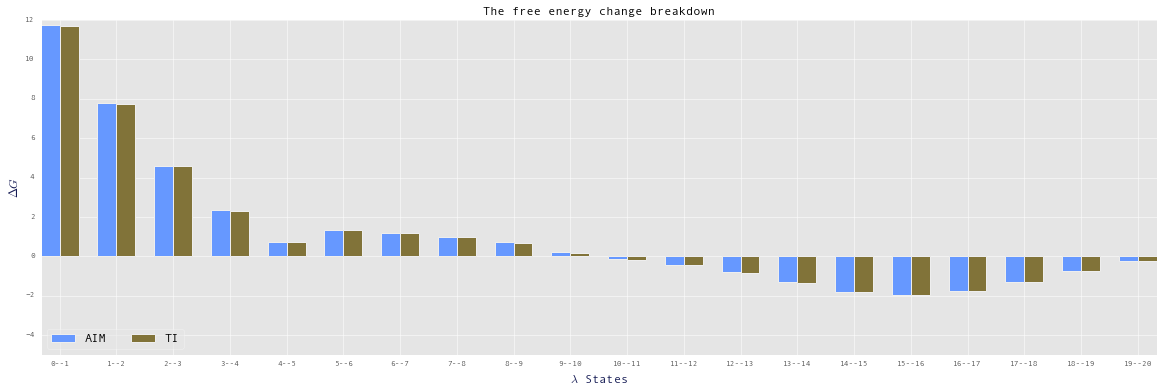

In [8]:
for i in times:
    df_allk = {}
    df_allk['AIM'] = aim_averages[i]
    df_allk['TI'] = ti_averages[i]
    print(i)
    am.plotdFvsLambda1(df_allk, ['AIM','TI'], ymin=-5, ymax=12, num_lambdas=20)

In [12]:
# convert values to kcal/mol
times = ["100ps","250ps", "500ps","1ns","5ns","10ns"]
for j in times:
    results[j] = results[j].apply(np.vectorize(am.convert_to_kj))

In [35]:
# plot the error bars
for j in times:
    if 'TI' in results[j]:
        del results[j]['TI']
    if 'MBAR' in results[j]:
        del results[j]['MBAR']
    print(j)
    

100ps
250ps
500ps
1ns
5ns
10ns


In [44]:
result = results['100ps'].apply(np.vectorize(am.convert_to_kcal))

100ps


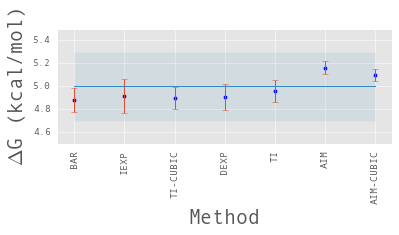

250ps


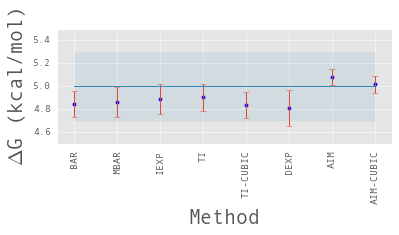

500ps


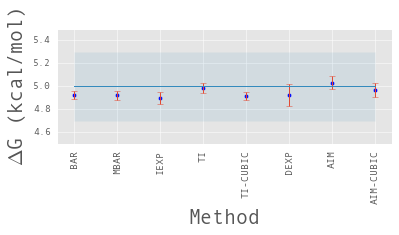

1ns


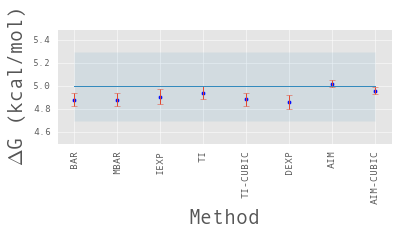

5ns


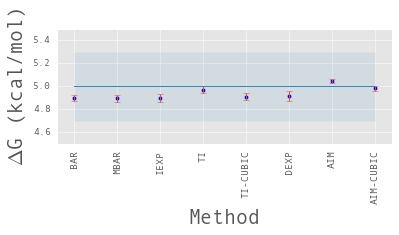

10ns


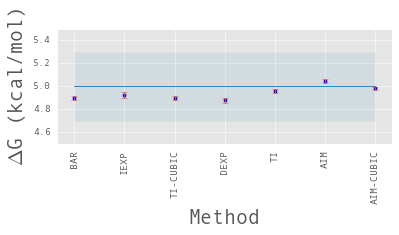

In [8]:
for i in times:
    print(i)
    am.plot_errorbars(results[i].apply(np.vectorize(am.convert_to_kcal)), ymin=4.5, ymax=5.5, exprmnt=5.0)

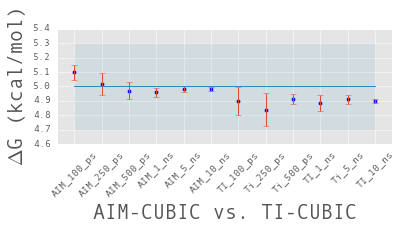

In [7]:
# Use Pymbar to get the results for cubic spline
# make sure to skip half of the xvg file
# Command line was: /Users/ChrisM/anaconda/bin/alchemical_analysis -t 300 -x -v -p prod -s 500 -i 0

# Get the result from each run to look like this
# 5 ns
#         TI  TI-CUBIC DEXP    IEXP    BAR  MBAR    AIM
# run01 18.782 18.524 18.349 18.633 18.522 18.510 15.22232
# run02 18.776 18.496 18.398 18.538 18.535 18.561 15.34766
# run03 18.665 18.404 18.218 18.541 18.402 18.438 15.39739
# run04 18.679 18.410 18.382 18.594 18.417 18.471 15.20885
# run05 18.679 18.400 18.316 18.543 18.408 18.441 15.09506

# Plot the results using error bars for each lambda window
import pandas as pd
df = pd.DataFrame()
df['AIM_100_ps'] = np.array(results['100ps']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['AIM_250_ps'] = np.array(results['250ps']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['AIM_500_ps'] = np.array(results['500ps']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['AIM_1_ns'] = np.array(results['1ns']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['AIM_5_ns'] = np.array(results['5ns']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['AIM_10_ns'] = np.array(results['10ns']['AIM-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))


df['TI_100_ps'] = np.array(results['100ps']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['Ti_250_ps'] = np.array(results['250ps']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['Ti_500_ps'] = np.array(results['500ps']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['TI_1_ns'] = np.array(results['1ns']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['Ti_5_ns'] = np.array(results['5ns']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))
df['TI_10_ns'] = np.array(results['10ns']['TI-CUBIC'].apply(np.vectorize(am.convert_to_kcal)))

# convert all values to kcal/mol
#df = df.apply(np.vectorize(convert_to_kcal))

plt.close()
labels = list(df.columns.values)
y = np.array(df.mean().values)
x = range(len(y))
plt.close()
plt.xticks(x, labels, rotation=45)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.5)
plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel('AIM-CUBIC vs. TI-CUBIC', fontsize = 20)
plt.errorbar(x, y, yerr=np.std(df), fmt=None)
plt.scatter(x, y)
#plt.ylim(20, 22.0)

y_value = np.ones(len(x))*5
plt.fill_between(x, y_value+0.3, y_value-0.3, alpha=.1)
plt.plot(x, y_value)

# Create a simple legend
plt.legend(loc=0, borderaxespad=0., fontsize=14, ncol=1)
plt.style.use('ggplot')

# Finally, save the figure as a png.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
#plt.savefig("all_compared.png", bbox_inches="tight", dpi=300);

In [8]:
df.describe()

,AIM_100_ps,AIM_250_ps,AIM_500_ps,AIM_1_ns,AIM_5_ns,AIM_10_ns,TI_100_ps,Ti_250_ps,Ti_500_ps,TI_1_ns,Ti_5_ns,TI_10_ns
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.097123,5.017147,4.968581,4.959230,4.981603,4.980696,4.900545,4.838080,4.914175,4.886008,4.909139,4.898823
std,0.060365,0.083832,0.066423,0.034197,0.022683,0.017195,0.107214,0.126750,0.038645,0.060509,0.035371,0.018996
min,5.016209,4.907837,4.913049,4.928779,4.956243,4.953516,4.784435,4.699995,4.867015,4.796356,4.857455,4.873322
25%,5.076260,4.997574,4.939247,4.932620,4.961621,4.976913,4.830019,4.798644,4.885195,4.853125,4.896319,4.885772
50%,5.078983,5.013453,4.942176,4.945181,4.988272,4.984580,4.890177,4.817033,4.921096,4.909936,4.907834,4.906337
75%,5.150984,5.024372,4.965835,4.982204,4.990376,4.989344,4.935757,4.829009,4.933514,4.928533,4.941127,4.907837
max,5.163179,5.142501,5.082595,5.007369,5.011506,4.999127,5.062337,5.045720,4.964054,4.942092,4.942961,4.920849


In [ ]:
"""
question about my prelim exam
5 years after prelim have to defend
I did 2nd defense May 5 of 2014. I have until May of 2019 to defend.
must register for 1 credit each academic year in order to stay active as a graduate studen
inactive for 2 years, have to reapply for graduation
Committee members form 2nd defense must sign paperwork.

Send an email out to committee members to have them sign COGS paperwork. 

Don't take the blame for not having the paperwork, COGS lost the form, sorry for the inconvenience. 


Research:
Run ex1 until it converges, until the histogram is no longer changing
"""

In [23]:
# these are labeled 100ps but they are 1ns
import pickle
runs = ["run06","run07", "run08","run09"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
root = ti_home+'1nsLL'
ti_names = ["dGCoulL","dGVdwL"]
separate = {}
separate['1nsLL'] = am.import_pickle(root, runs, 'results')

aim_runs = ["run01","run02", "run03","run04"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
cubic_states = {}
trapz_states = {}
totals = []
cubics = []
cubic_states['1nsLL'] = {}
trapz_states['1nsLL'] = {}
for i in aim_runs:
    cubic_states['1nsLL'][i] = []
    trapz_states['1nsLL'][i] = []
    file_in = "/Users/ChrisM/Documents/workspace/AIM/1nsLL/1nsLL{0}.out".format(i)
    aim, aim_cubic, counts, trapz, cubic = am.quad_AIM(file_in, names)
    totals.append(aim)
    cubics.append(aim_cubic)
    trapz_states['1nsLL'][i] = trapz
    cubic_states['1nsLL'][i] = cubic
#hist_flatness(counts, j)
#separate['1nsLL']['AIM'] = np.array(totals)
separate['1nsLL']['AIM-CUBIC'] = np.array(cubics)

In [24]:
stats.ttest_ind(separate['1nsLL']['AIM-CUBIC'], separate['1nsLL']['TI-CUBIC'], equal_var=False)

Ttest_indResult(statistic=1.9427471251194122, pvalue=0.1312243118862092)

In [25]:
stats.ttest_ind(results['1ns']['AIM-CUBIC'], results['1ns']['TI-CUBIC'], equal_var=False)

Ttest_indResult(statistic=2.3557011722006003, pvalue=0.054501523144987213)

In [26]:
stats.ttest_ind(results['1ns']['AIM-CUBIC'], separate['1nsLL']['TI-CUBIC'], equal_var=False)

Ttest_indResult(statistic=0.9457696828067057, pvalue=0.40046861106484072)

In [27]:
runs = ["run01","run02","run03","run04","run05"]

TI_dGCoulL = pd.DataFrame(columns=range(21),index=range(25))
AIM_dGCoulL = pd.DataFrame(columns=range(21),index=range(25))
TI_dGVdwL = pd.DataFrame(columns=range(21),index=range(25))
AIM_dGVdwL = pd.DataFrame(columns=range(21),index=range(25))
all_lambdas = {}
all_lambdas['TI_dGCoulL'] = {}
all_lambdas['TI_dGVdwL'] = {}
all_lambdas['AIM_dGCoulL'] = {}
all_lambdas['AIM_dGVdwL'] = {}

times = ["1ns"]

for j in times:
    all_lambdas['AIM_dGCoulL'][j]= pd.DataFrame(columns=range(21),index=range(5))
    all_lambdas['AIM_dGVdwL'][j]= pd.DataFrame(columns=range(21),index=range(5))
    all_lambdas['TI_dGCoulL'][j]= pd.DataFrame(columns=range(21),index=range(5))
    all_lambdas['TI_dGVdwL'][j]= pd.DataFrame(columns=range(21),index=range(5))
    for i in range(len(runs)):
        aim_location = "/Users/ChrisM/Documents/workspace/AIM/{0}/{0}{1}.out".format(j,runs[i])
        AIM = pd.read_csv(
            aim_location, 
            header = None,
            names = names,
            delim_whitespace=True)

        all_lambdas['AIM_dGCoulL'][j].iloc[i]= AIM.dGCoulL
        all_lambdas['AIM_dGVdwL'][j].iloc[i]= AIM.dGVdwL

        ti_location = "/Users/ChrisM/Documents/workspace/TI/{0}/{1}.out".format(j,runs[i])
        TI = pd.read_csv(
            ti_location, 
            header = None,
            names = ti_names,
            delim_whitespace=True)

        all_lambdas['TI_dGCoulL'][j].iloc[i]= TI.dGCoulL
        all_lambdas['TI_dGVdwL'][j].iloc[i]= TI.dGVdwL

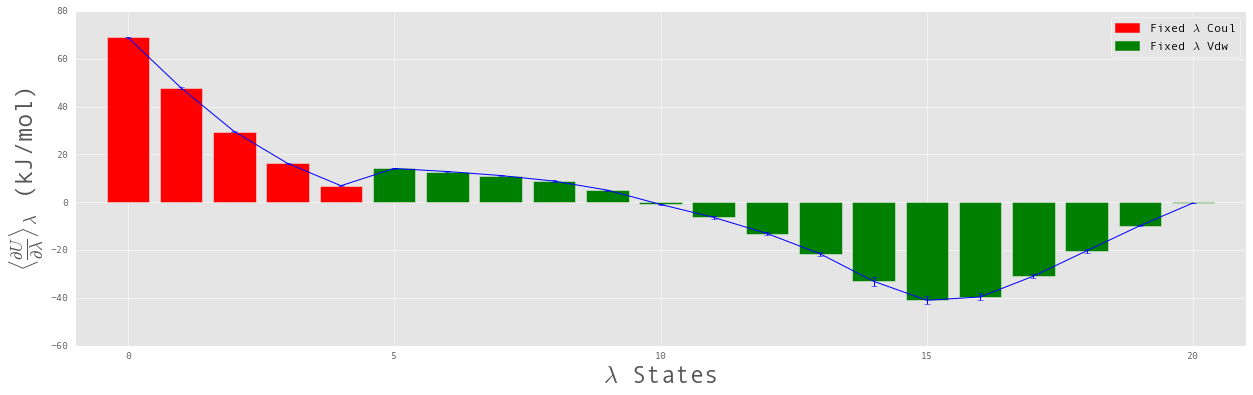

In [28]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
vdwLambdas = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]

# want coul components where coulLambdas not equal to 1.0
# want vdw components where vdwLambdas not equal to 0.0
plt.figure(figsize=(len(coulLambdas), 6))
y2 = np.zeros(len(coulLambdas))
ti_results = []
for j in times:
    for i in range(len(coulLambdas)):

        if coulLambdas[i] != 1.0:
            avg = all_lambdas['TI_dGCoulL'][j][i].mean()
            y2[i] = (all_lambdas['TI_dGCoulL'][j][i].mean())
            err = np.std(all_lambdas['TI_dGCoulL'][j][i])
            ti_results.append(err)
            plt.bar(i, avg, color='r',align='center')

        else:
            avg = all_lambdas['TI_dGVdwL'][j][i].mean()
            y2[i] = (all_lambdas['TI_dGVdwL'][j][i].mean())
            err = np.std(all_lambdas['TI_dGVdwL'][j][i])
            ti_results.append(err)
            plt.bar(i, avg, color='g', align='center')

    x = range(0,len(coulLambdas))        
    #plt.plot(x, y2, color='g', label="Fixed $\lambda$")
    plt.errorbar(x, y2, color='b', yerr=ti_results, fmt='-')
    plt.xlim(-1,len(coulLambdas))
    plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
    plt.xlabel(r'$\lambda$ States', fontsize = 24)
    red_patch = mpatches.Patch(color='red', label='Fixed $\lambda$ Coul')
    green_patch = mpatches.Patch(color='green', label='Fixed $\lambda$ Vdw')


plt.legend(handles=[red_patch, green_patch]);

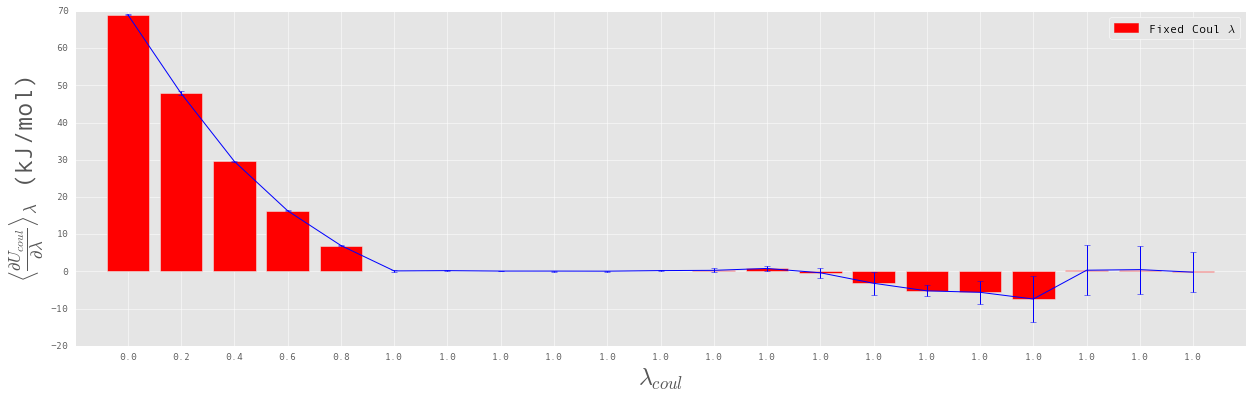

In [29]:
# just coulomb values
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
vdwLambdas = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
# want coul components where coulLambdas not equal to 1.0
plt.figure(figsize=(len(coulLambdas), 6))
y2 = np.zeros(len(coulLambdas))
ti_results = []
for j in times:
    for i in range(len(coulLambdas)):
        avg = all_lambdas['TI_dGCoulL'][j][i].mean()
        y2[i] = (all_lambdas['TI_dGCoulL'][j][i].mean())
        err = np.std(all_lambdas['TI_dGCoulL'][j][i])
        ti_results.append(err)
        plt.bar(i, avg, color='r',align='center')


    x = range(0,len(coulLambdas))        
    plt.errorbar(x, y2, color='b', yerr=ti_results, fmt='-')
    plt.xlim(-1,len(coulLambdas))
    plt.ylabel(r'$\langle\frac{\partial U_{coul}}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
    plt.xlabel(r'$\lambda_{coul}$', fontsize = 24)
    red_patch = mpatches.Patch(color='red', label='Fixed Coul $\lambda$')
    plt.xticks(x, coulLambdas)

    plt.legend(handles=[red_patch]);

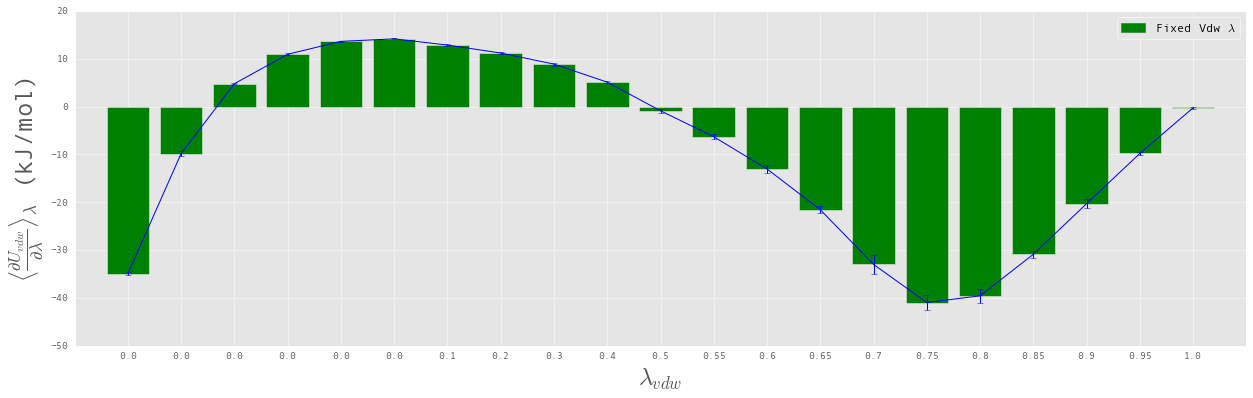

In [30]:
# just coulomb values
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
vdwLambdas = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
# want vdw components where vdwLambdas not equal to 0.0
plt.figure(figsize=(len(vdwLambdas), 6))
y2 = np.zeros(len(vdwLambdas))
ti_results = []
for j in times:
    for i in range(len(vdwLambdas)):
            avg = all_lambdas['TI_dGVdwL'][j][i].mean()
            y2[i] = (all_lambdas['TI_dGVdwL'][j][i].mean())
            err = np.std(all_lambdas['TI_dGVdwL'][j][i])
            ti_results.append(err)
            plt.bar(i, avg, color='g', align='center')

    x = range(0,len(vdwLambdas))        
    plt.errorbar(x, y2, color='b', yerr=ti_results, fmt='-')
    plt.xlim(-1,len(coulLambdas))
    plt.ylabel(r'$\langle\frac{\partial U_{vdw}}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
    plt.xlabel(r'$\lambda_{vdw}$', fontsize = 24)
    green_patch = mpatches.Patch(color='green', label='Fixed Vdw $\lambda$')
    plt.xticks(x, vdwLambdas)

    plt.legend(handles=[green_patch]);

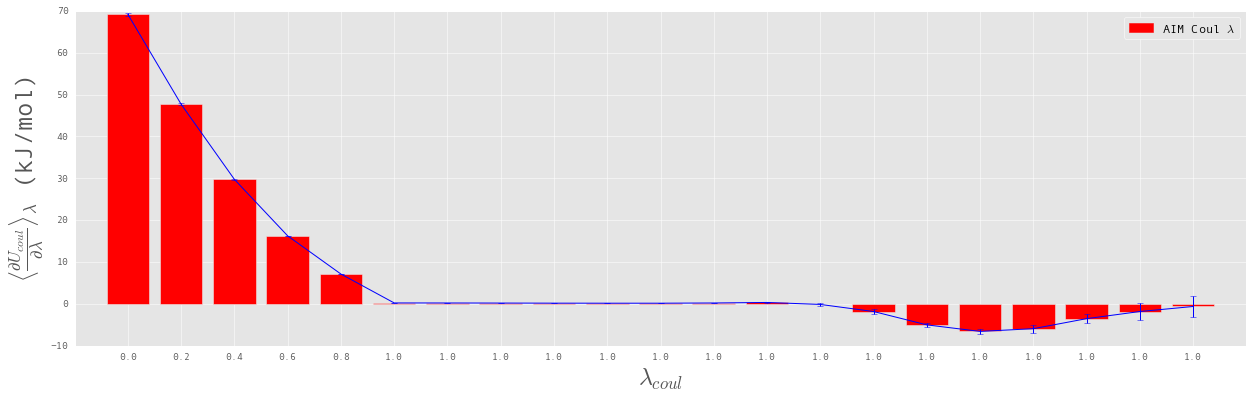

In [31]:
# just coulomb values
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
vdwLambdas = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
# want coul components where coulLambdas not equal to 1.0
plt.figure(figsize=(len(coulLambdas), 6))
y2 = np.zeros(len(coulLambdas))
ti_results = []
for j in times:
    for i in range(len(coulLambdas)):
        avg = all_lambdas['AIM_dGCoulL'][j][i].mean()
        y2[i] = (all_lambdas['AIM_dGCoulL'][j][i].mean())
        err = np.std(all_lambdas['AIM_dGCoulL'][j][i])
        ti_results.append(err)
        plt.bar(i, avg, color='r',align='center')


    x = range(0,len(coulLambdas))        
    plt.errorbar(x, y2, color='b', yerr=ti_results, fmt='-')
    plt.xlim(-1,len(coulLambdas))
    plt.ylabel(r'$\langle\frac{\partial U_{coul}}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
    plt.xlabel(r'$\lambda_{coul}$', fontsize = 24)
    red_patch = mpatches.Patch(color='red', label='AIM Coul $\lambda$')
    plt.xticks(x, coulLambdas)

    plt.legend(handles=[red_patch]);

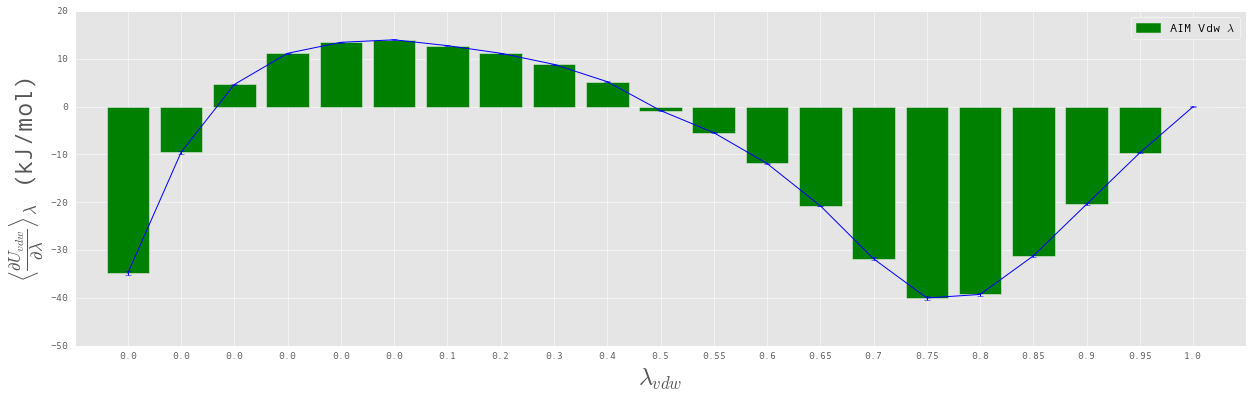

In [32]:
# just coulomb values
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
vdwLambdas = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
# want vdw components where vdwLambdas not equal to 0.0
plt.figure(figsize=(len(vdwLambdas), 6))
y2 = np.zeros(len(vdwLambdas))
ti_results = []
for j in times:
    for i in range(len(vdwLambdas)):
            avg = all_lambdas['AIM_dGVdwL'][j][i].mean()
            y2[i] = (all_lambdas['AIM_dGVdwL'][j][i].mean())
            err = np.std(all_lambdas['AIM_dGVdwL'][j][i])
            ti_results.append(err)
            plt.bar(i, avg, color='g', align='center')

    x = range(0,len(vdwLambdas))        
    plt.errorbar(x, y2, color='b', yerr=ti_results, fmt='-')
    plt.xlim(-1,len(coulLambdas))
    plt.ylabel(r'$\langle\frac{\partial U_{vdw}}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
    plt.xlabel(r'$\lambda_{vdw}$', fontsize = 24)
    green_patch = mpatches.Patch(color='green', label='AIM Vdw $\lambda$')
    plt.xticks(x, vdwLambdas)

    plt.legend(handles=[green_patch]);

1ns


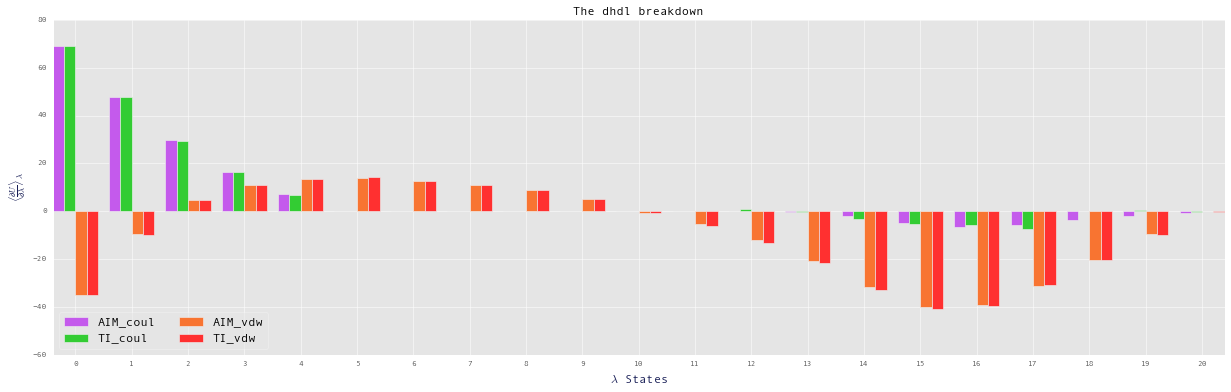

In [37]:
for j in times:
    aim_coul_averages = []
    aim_vdw_averages = []
    for i in range(21):
        aim_coul_averages.append((all_lambdas['AIM_dGCoulL'][j][i].mean()))
        aim_vdw_averages.append((all_lambdas['AIM_dGVdwL'][j][i].mean()))


    ti_coul_averages = []
    ti_vdw_averages = []
    for i in range(21):
        ti_coul_averages.append((all_lambdas['TI_dGCoulL'][j][i].mean()))
        ti_vdw_averages.append((all_lambdas['TI_dGVdwL'][j][i].mean()))

    df_allk = {}
    df_allk['AIM_coul'] = aim_coul_averages
    df_allk['TI_coul'] = ti_coul_averages
    df_allk['AIM_vdw'] = aim_vdw_averages
    df_allk['TI_vdw'] = ti_vdw_averages
    print(j)
    am.plotdFvsLambda2(df_allk, ['AIM_coul','TI_coul','AIM_vdw','TI_vdw'], ymin=-60,ymax=80,num_lambdas=21)

In [12]:
# collect all of the TI information
runs = [""]
home = "/Users/ChrisM/Documents/workspace/TI/33ls/"
times = ["100ps"]
coulLambdas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.0]
vdwLambdas = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.52, 0.54, 0.56, 0.58, 0.60, 0.62, 0.64, 0.66, 0.68, 0.70, 0.72, 0.74, 0.70, 0.78, 0.80, 0.82, 0.84, 0.86, 0.88, 0.90, 0.95, 1.0]
runs = ["run01","run02","run03","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]

# create a dictionary to hold our results
# each result is a dataframe
# these results aren't comparable because they are for a different setup but we use
# this to init our dictionary
results = {}

for i in times:
    root = home
    results[i] = am.import_pickle(root, runs, "results")

In [13]:
results

{'100ps':          BAR       IEXP   TI-CUBIC       DEXP         TI
 0  21.236747  22.244410  20.535100  19.917936  21.553792
 1  19.677051  19.466528  18.407209  20.188511  20.207316
 2  21.298380  20.201102  19.375200  22.296529  21.566606
 3  20.129403  19.727119  18.281184  20.377395  20.490174}

In [14]:
# collect AIM results
files = ["aim100ps33ls01","aim100ps33ls02","aim100ps33ls03","aim100ps33ls04"]
home = "/Users/ChrisM/Documents/workspace/AIM/33ls/"
cubic_states = {}
trapz_states = {}
aim_counts = {}
for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    aim_counts[j] = {}
    for i in files:
        cubic_states[j][i] = []
        trapz_states[j][i] = []
        file_in = home+i+".out"
        aim, aim_cubic, counts, trapz, cubic = am.quad_AIM(file_in, names)
        totals.append(aim)
        cubics.append(aim_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        aim_counts[j][i] = counts
    #hist_flatness(counts, j)
    results[j]['AIM'] = np.array(totals)
    results[j]['AIM-CUBIC'] = np.array(cubics)
    


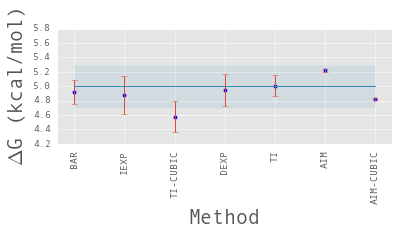

In [19]:
result = results['100ps'].apply(np.vectorize(am.convert_to_kcal))
am.plot_errorbars(result, ymin=4.2, ymax=5.8, exprmnt=5.0)

TI-CUBIC = 19.854  +-  0.519

In [72]:
results['100ps']['AIM-CUBIC']

0    19.525106
Name: AIM-CUBIC, dtype: float64